## Read data

In [2]:
from nilearn.glm.first_level import first_level_from_bids

#BIDS directory
#data_dir='/work/816119/InSpePosNegData/BIDS_2023E/'
#  
#Martines file path
data_dir='/work/InSpePosNegData/BIDS_2023E/' 
# BIDS derivatives (contains preprocessed data)
#derivatives_dir =  '/work/816119/InSpePosNegData/BIDS_2023E/derivatives'  

#Martines file path
derivatives_dir =  '/work/InSpePosNegData/BIDS_2023E/derivatives'  

# Name for experiment in the BIDS directory
task_label = 'boldinnerspeech'
# Label for data that are spatially aligned to the MNI152 template (i.e. spatially normalised)
space_label ='MNI152NLin2009cAsym'
#Run the function that can gather all the needed info from a BIDS folder
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(
        data_dir, task_label, derivatives_folder=derivatives_dir, n_jobs=6, verbose=0,
        img_filters=[('desc', 'preproc')])

#Print the data from the first participant as sanity check
print(models_run_imgs[0])

/home/ucloud/.local/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1148: UserWarning: 'slice_time_ref' provided (0.0) is different from the value found in the BIDS dataset (0.462).
Note this may lead to the wrong model specification.
  warn(


['/work/InSpePosNegData/BIDS_2023E/derivatives/sub-0119/func/sub-0119_task-boldinnerspeech_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/InSpePosNegData/BIDS_2023E/derivatives/sub-0119/func/sub-0119_task-boldinnerspeech_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/InSpePosNegData/BIDS_2023E/derivatives/sub-0119/func/sub-0119_task-boldinnerspeech_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/InSpePosNegData/BIDS_2023E/derivatives/sub-0119/func/sub-0119_task-boldinnerspeech_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/InSpePosNegData/BIDS_2023E/derivatives/sub-0119/func/sub-0119_task-boldinnerspeech_run-5_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/InSpePosNegData/BIDS_2023E/derivatives/sub-0119/func/sub-0119_task-boldinnerspeech_run-6_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']


### Define subject number

In [4]:
#Printing models to find our subject 
print(models)
subject_nr = 2 #Changes everytime we load the data, therefore make sure we have the right participant

# Checking if we have the right subject (should be 0122)
print(models[subject_nr])

[FirstLevelModel(n_jobs=6, subject_label='0119', t_r=1), FirstLevelModel(n_jobs=6, subject_label='0116', t_r=1), FirstLevelModel(n_jobs=6, subject_label='0122', t_r=1), FirstLevelModel(n_jobs=6, subject_label='0118', t_r=1), FirstLevelModel(n_jobs=6, subject_label='0121', t_r=1), FirstLevelModel(n_jobs=6, subject_label='0120', t_r=1), FirstLevelModel(n_jobs=6, subject_label='0117', t_r=1), FirstLevelModel(n_jobs=6, subject_label='0123', t_r=1)]
FirstLevelModel(n_jobs=6, subject_label='0122', t_r=1)


### Data sanity check

In [5]:
import os
# Get the file names for our subjects functional data
# We should see our 6 blocks
func=([os.path.basename(run) for run in models_run_imgs[subject_nr]])
print(func)

['sub-0122_task-boldinnerspeech_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0122_task-boldinnerspeech_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0122_task-boldinnerspeech_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0122_task-boldinnerspeech_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0122_task-boldinnerspeech_run-5_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0122_task-boldinnerspeech_run-6_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']


### Inspecting data

In [6]:
from nilearn import image

# Get the full path
func_path=([os.path.abspath(run) for run in models_run_imgs[subject_nr]])
# Load the image and inspect data size
func_img = image.load_img(func_path)
print("Shape of functional MRI image: %s" % (func_img.shape,))

Shape of functional MRI image: (78, 92, 78, 2940)


## Events

### Print events

In [7]:
# First number: subject
# Second number: block

print(models_events[subject_nr][0])

print(models[subject_nr])

         onset  duration trial_type cued_word_pos cued_word_neg response  \
0     1.008497  0.688047     IMG_BI    remarkable     worthless      NaN   
1     7.313246  0.699621     IMG_NS    remarkable     worthless      NaN   
2    11.629857  0.700280     IMG_NS    remarkable     worthless      NaN   
3    16.947065  0.699671     IMG_BI    remarkable     worthless        b   
4    21.263703  0.699884     IMG_BI    remarkable     worthless        b   
..         ...       ...        ...           ...           ...      ...   
85  451.935381  0.699673     IMG_PS    remarkable     worthless      NaN   
86  457.252243  0.700083     IMG_BI    remarkable     worthless        b   
87  462.569074  0.699913     IMG_PS    remarkable     worthless      NaN   
88  468.886482  0.699660     IMG_NS    remarkable     worthless      NaN   
89  475.204647  0.698057     IMG_NS    remarkable     worthless      NaN   

          RT  run   ID             task  
0        NaN    1  122  boldinnerspeech  
1  

### Edit events

In [8]:
# Print model confounds for our participant, first run
print(models_events[subject_nr][0].columns)

events_sub= ['onset','duration','trial_type']
print(len(models_events))

# Subset model events with selection
for ii in range(len(models_events)):
    events=models_events[ii][:]
    for i in range(len(events)):
        events2=events[i]
        events2=events2[events_sub]
        events[i]=events2
        # Rename trials to make contrasting easier
        events[i].replace({'IMG_NS': 'N', 'IMG_PS': 'P', 'IMG_NO': 'N', 'IMG_PO': 'P','IMG_BI': 'B'}, inplace = True)
       
    models_events[ii][:]=events
    
        
# Print new confounds, for our participant, first run
print(models_events[subject_nr][0].columns)

Index(['onset', 'duration', 'trial_type', 'cued_word_pos', 'cued_word_neg',
       'response', 'RT', 'run', 'ID', 'task'],
      dtype='object')
8
Index(['onset', 'duration', 'trial_type'], dtype='object')


/tmp/ipykernel_916/1173751530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events[i].replace({'IMG_NS': 'N', 'IMG_PS': 'P', 'IMG_NO': 'N', 'IMG_PO': 'P','IMG_BI': 'B'}, inplace = True)
/tmp/ipykernel_916/1173751530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events[i].replace({'IMG_NS': 'N', 'IMG_PS': 'P', 'IMG_NO': 'N', 'IMG_PO': 'P','IMG_BI': 'B'}, inplace = True)
/tmp/ipykernel_916/1173751530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

## Confounds

### Print confounds

In [34]:
# Print model confounds for our participant, first run
print(models_confounds[subject_nr][0].columns)

Index(['global_signal', 'global_signal_derivative1', 'global_signal_power2',
       'global_signal_derivative1_power2', 'csf', 'csf_derivative1',
       'csf_power2', 'csf_derivative1_power2', 'white_matter',
       'white_matter_derivative1',
       ...
       'motion_outlier00', 'motion_outlier01', 'motion_outlier02',
       'motion_outlier03', 'motion_outlier04', 'motion_outlier05',
       'motion_outlier06', 'motion_outlier07', 'motion_outlier08',
       'motion_outlier09'],
      dtype='object', length=362)


In [9]:
print(models_confounds[0][0].columns[0:99])

Index(['global_signal', 'global_signal_derivative1', 'global_signal_power2',
       'global_signal_derivative1_power2', 'csf', 'csf_derivative1',
       'csf_power2', 'csf_derivative1_power2', 'white_matter',
       'white_matter_derivative1', 'white_matter_power2',
       'white_matter_derivative1_power2', 'csf_wm', 'tcompcor', 'std_dvars',
       'dvars', 'framewise_displacement', 'rmsd', 't_comp_cor_00',
       't_comp_cor_01', 't_comp_cor_02', 't_comp_cor_03', 'c_comp_cor_00',
       'c_comp_cor_01', 'c_comp_cor_02', 'c_comp_cor_03', 'c_comp_cor_04',
       'c_comp_cor_05', 'c_comp_cor_06', 'c_comp_cor_07', 'c_comp_cor_08',
       'c_comp_cor_09', 'c_comp_cor_10', 'c_comp_cor_11', 'c_comp_cor_12',
       'c_comp_cor_13', 'c_comp_cor_14', 'c_comp_cor_15', 'c_comp_cor_16',
       'c_comp_cor_17', 'c_comp_cor_18', 'c_comp_cor_19', 'c_comp_cor_20',
       'c_comp_cor_21', 'c_comp_cor_22', 'c_comp_cor_23', 'c_comp_cor_24',
       'c_comp_cor_25', 'c_comp_cor_26', 'c_comp_cor_27', 'c_com

In [15]:
print(models_confounds[0][0].columns[300:362])

Index(['a_comp_cor_109', 'a_comp_cor_110', 'a_comp_cor_111', 'a_comp_cor_112',
       'a_comp_cor_113', 'a_comp_cor_114', 'a_comp_cor_115', 'a_comp_cor_116',
       'a_comp_cor_117', 'a_comp_cor_118', 'a_comp_cor_119', 'a_comp_cor_120',
       'a_comp_cor_121', 'a_comp_cor_122', 'a_comp_cor_123', 'a_comp_cor_124',
       'a_comp_cor_125', 'a_comp_cor_126', 'a_comp_cor_127', 'a_comp_cor_128',
       'a_comp_cor_129', 'a_comp_cor_130', 'cosine00', 'cosine01', 'cosine02',
       'cosine03', 'cosine04', 'cosine05', 'trans_x', 'trans_x_derivative1',
       'trans_x_power2', 'trans_x_derivative1_power2', 'trans_y',
       'trans_y_derivative1', 'trans_y_derivative1_power2', 'trans_y_power2',
       'trans_z', 'trans_z_derivative1', 'trans_z_derivative1_power2',
       'trans_z_power2', 'rot_x', 'rot_x_derivative1', 'rot_x_power2',
       'rot_x_derivative1_power2', 'rot_y', 'rot_y_derivative1',
       'rot_y_derivative1_power2', 'rot_y_power2', 'rot_z',
       'rot_z_derivative1', 'rot_z_der

### Plot motion parameters

In [19]:
trans_x_0 = models_confounds[subject_nr][0]['trans_x']
trans_x_1 = models_confounds[subject_nr][1]['trans_x']
trans_x_2 = models_confounds[subject_nr][2]['trans_x']
trans_x_3 = models_confounds[subject_nr][3]['trans_x']
trans_x_4 = models_confounds[subject_nr][4]['trans_x']
trans_x_5 = models_confounds[subject_nr][5]['trans_x']

In [20]:
trans_y_0 = models_confounds[subject_nr][0]['trans_y']
trans_y_1 = models_confounds[subject_nr][1]['trans_y']
trans_y_2 = models_confounds[subject_nr][2]['trans_y']
trans_y_3 = models_confounds[subject_nr][3]['trans_y']
trans_y_4 = models_confounds[subject_nr][4]['trans_y']
trans_y_5 = models_confounds[subject_nr][5]['trans_y']

In [21]:
trans_z_0 = models_confounds[subject_nr][0]['trans_z']
trans_z_1 = models_confounds[subject_nr][1]['trans_z']
trans_z_2 = models_confounds[subject_nr][2]['trans_z']
trans_z_3 = models_confounds[subject_nr][3]['trans_z']
trans_z_4 = models_confounds[subject_nr][4]['trans_z']
trans_z_5 = models_confounds[subject_nr][5]['trans_z']

In [22]:
rot_x_0 = models_confounds[subject_nr][0]['rot_x']
rot_x_1 = models_confounds[subject_nr][1]['rot_x']
rot_x_2 = models_confounds[subject_nr][2]['rot_x']
rot_x_3 = models_confounds[subject_nr][3]['rot_x']
rot_x_4 = models_confounds[subject_nr][4]['rot_x']
rot_x_5 = models_confounds[subject_nr][5]['rot_x']

In [23]:
rot_y_0 = models_confounds[subject_nr][0]['rot_y']
rot_y_1 = models_confounds[subject_nr][1]['rot_y']
rot_y_2 = models_confounds[subject_nr][2]['rot_y']
rot_y_3 = models_confounds[subject_nr][3]['rot_y']
rot_y_4 = models_confounds[subject_nr][4]['rot_y']
rot_y_5 = models_confounds[subject_nr][5]['rot_y']

In [24]:
rot_z_0 = models_confounds[subject_nr][0]['rot_z']
rot_z_1 = models_confounds[subject_nr][1]['rot_z']
rot_z_2 = models_confounds[subject_nr][2]['rot_z']
rot_z_3 = models_confounds[subject_nr][3]['rot_z']
rot_z_4 = models_confounds[subject_nr][4]['rot_z']
rot_z_5 = models_confounds[subject_nr][5]['rot_z']

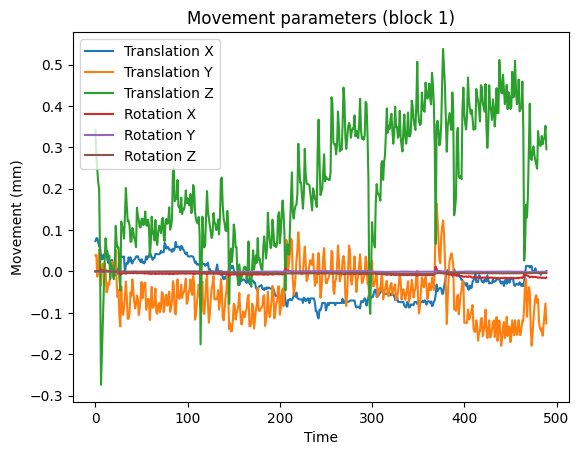

In [25]:
import matplotlib.pyplot as plt

x_values = trans_x_0.index

# Plot each variable
plt.plot(x_values, trans_x_0, label='Translation X')
plt.plot(x_values, trans_y_0, label='Translation Y')
plt.plot(x_values, trans_z_0, label='Translation Z')
plt.plot(x_values, rot_x_0, label='Rotation X')
plt.plot(x_values, rot_y_0, label='Rotation Y')
plt.plot(x_values, rot_z_0, label='Rotation Z')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Movement (mm)')
plt.title('Movement parameters (block 1)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

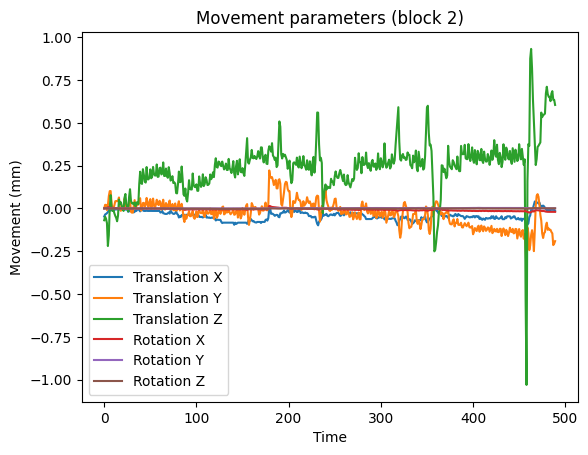

In [26]:
import matplotlib.pyplot as plt

x_values = trans_x_0.index

# Plot each variable
plt.plot(x_values, trans_x_1, label='Translation X')
plt.plot(x_values, trans_y_1, label='Translation Y')
plt.plot(x_values, trans_z_1, label='Translation Z')
plt.plot(x_values, rot_x_1, label='Rotation X')
plt.plot(x_values, rot_y_1, label='Rotation Y')
plt.plot(x_values, rot_z_1, label='Rotation Z')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Movement (mm)')
plt.title('Movement parameters (block 2)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

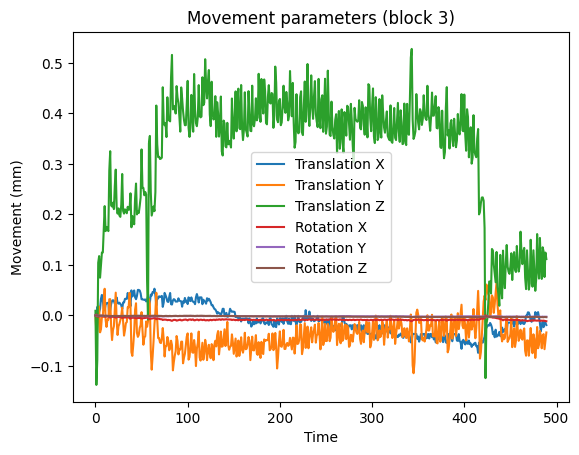

In [27]:
import matplotlib.pyplot as plt

x_values = trans_x_0.index

# Plot each variable
plt.plot(x_values, trans_x_2, label='Translation X')
plt.plot(x_values, trans_y_2, label='Translation Y')
plt.plot(x_values, trans_z_2, label='Translation Z')
plt.plot(x_values, rot_x_2, label='Rotation X')
plt.plot(x_values, rot_y_2, label='Rotation Y')
plt.plot(x_values, rot_z_2, label='Rotation Z')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Movement (mm)')
plt.title('Movement parameters (block 3)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

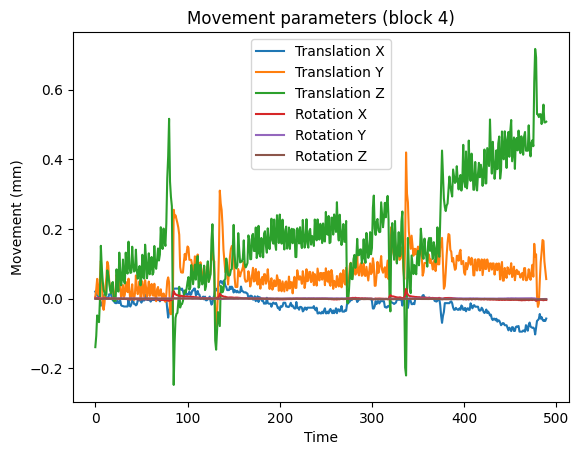

In [28]:
import matplotlib.pyplot as plt

x_values = trans_x_0.index

# Plot each variable
plt.plot(x_values, trans_x_3, label='Translation X')
plt.plot(x_values, trans_y_3, label='Translation Y')
plt.plot(x_values, trans_z_3, label='Translation Z')
plt.plot(x_values, rot_x_3, label='Rotation X')
plt.plot(x_values, rot_y_3, label='Rotation Y')
plt.plot(x_values, rot_z_3, label='Rotation Z')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Movement (mm)')
plt.title('Movement parameters (block 4)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

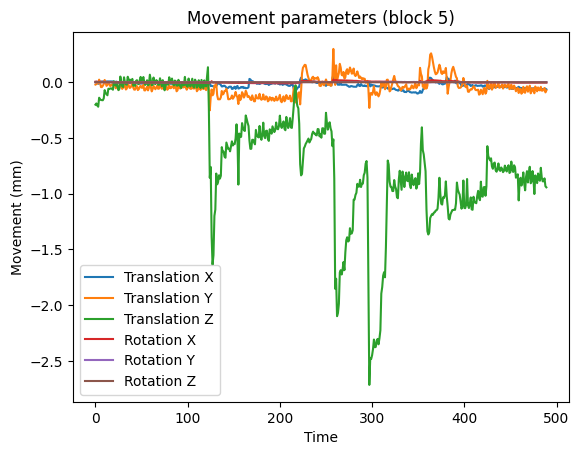

In [29]:
import matplotlib.pyplot as plt

x_values = trans_x_0.index

# Plot each variable
plt.plot(x_values, trans_x_4, label='Translation X')
plt.plot(x_values, trans_y_4, label='Translation Y')
plt.plot(x_values, trans_z_4, label='Translation Z')
plt.plot(x_values, rot_x_4, label='Rotation X')
plt.plot(x_values, rot_y_4, label='Rotation Y')
plt.plot(x_values, rot_z_4, label='Rotation Z')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Movement (mm)')
plt.title('Movement parameters (block 5)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

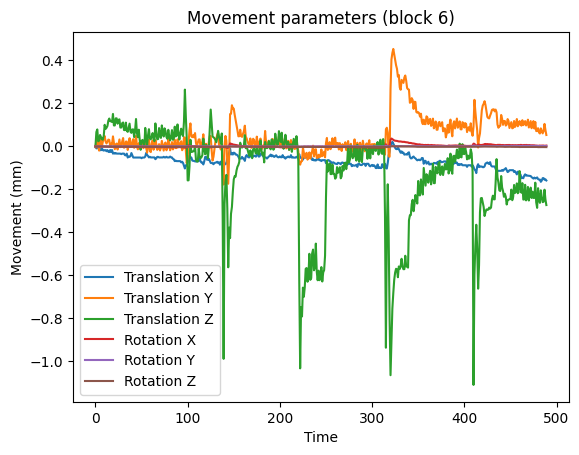

In [30]:
import matplotlib.pyplot as plt

x_values = trans_x_0.index

# Plot each variable
plt.plot(x_values, trans_x_5, label='Translation X')
plt.plot(x_values, trans_y_5, label='Translation Y')
plt.plot(x_values, trans_z_5, label='Translation Z')
plt.plot(x_values, rot_x_5, label='Rotation X')
plt.plot(x_values, rot_y_5, label='Rotation Y')
plt.plot(x_values, rot_z_5, label='Rotation Z')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Movement (mm)')
plt.title('Movement parameters (block 6)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Edit confounds

In [45]:
confound_friston24 = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2']

confound_friston24_GSR = ['global_signal','global_signal_derivative1','global_signal_power2','global_signal_derivative1_power2','trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2']

#Choosing to include the temporal PCA confound regressors as well as fristons and global signal 
confound_friston24_GSR_compcor = ['global_signal','global_signal_derivative1','global_signal_power2','global_signal_derivative1_power2','trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2','tcompcor']


# Subset confounds with selection
for ii in range(len(models_confounds)):
    confounds1=models_confounds[ii][:].copy()
    for i in range(len(confounds1)):
        confounds2=confounds1[i].copy()
        confounds2=confounds2[confound_friston24_GSR_compcor]
        #Removing NAs in the first row.
        confounds2.loc[0,:]=confounds2.loc[1,:]
        confounds1[i]=confounds2
    models_confounds[ii][:]=confounds1


# Print new confounds, our participant, first run
print(models_confounds[subject_nr][0].columns)

#Getting an error, but we dont know what to do with it

Index(['global_signal', 'global_signal_derivative1', 'global_signal_power2',
       'global_signal_derivative1_power2', 'trans_x', 'trans_y', 'trans_z',
       'rot_x', 'rot_y', 'rot_z', 'trans_x_derivative1', 'trans_y_derivative1',
       'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1',
       'rot_z_derivative1', 'trans_x_power2', 'trans_y_power2',
       'trans_z_power2', 'rot_x_power2', 'rot_y_power2', 'rot_z_power2',
       'tcompcor'],
      dtype='object')


## Design matrix for sanity check

In [46]:
# Get data and model info for our participant
model = models[subject_nr]
imgs = models_run_imgs[subject_nr]
events = models_events[subject_nr]
confounds = models_confounds[subject_nr]

# Fit the model - this will also generate a design matrix
model.fit(imgs,events,confounds)

/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:76: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn(
/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:76: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn(
/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:76: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn(
/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:76: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn(


FirstLevelModel(n_jobs=6, subject_label='0122', t_r=1)

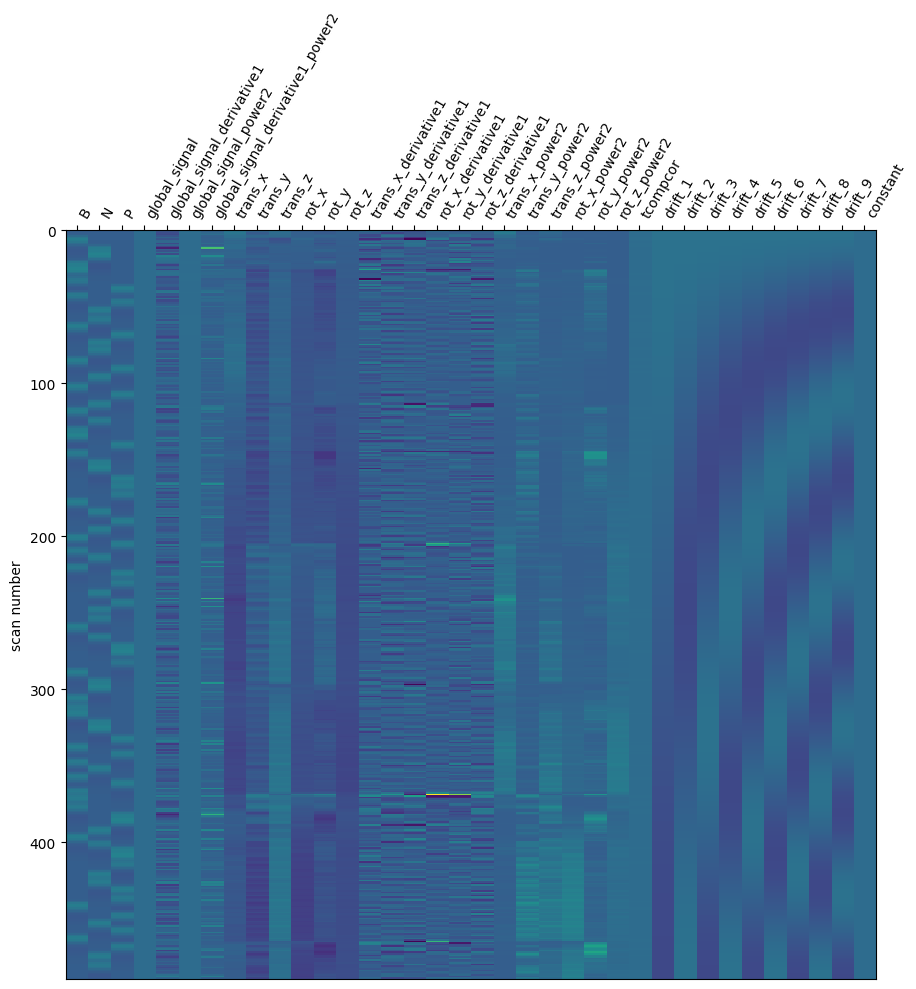

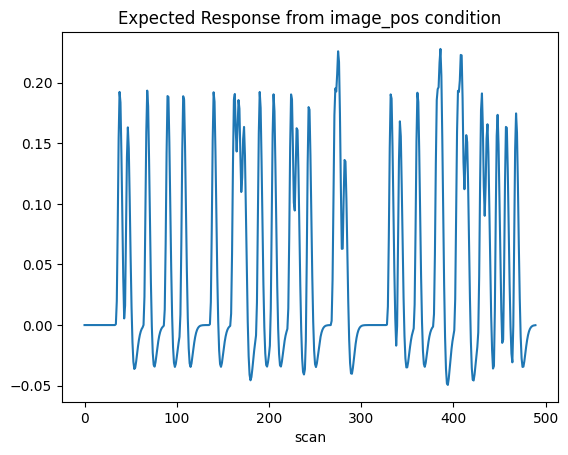

<Axes: >

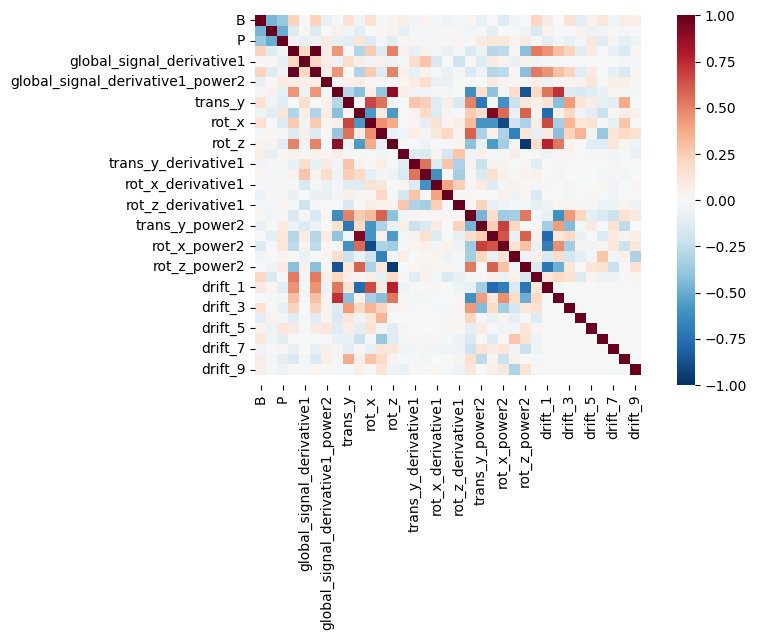

In [47]:
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt

# View the design matrix from the first session
design_matrix = model.design_matrices_[0]

# Rename design matrix columns
design_matrix.rename(columns={"IMG_BI":  "B","IMG_NS": "N", 'IMG_PS': 'P', 'IMG_NO': 'N', 'IMG_PO': 'P'}, inplace = True)

# Plot the design matrix
plot_design_matrix(design_matrix)
plt.show()

# Also plot time series
plt.plot(design_matrix['P'])
plt.xlabel('scan')
plt.title('Expected Response from image_pos condition')
plt.show()

import seaborn as sns
sns.heatmap(design_matrix.corr(), vmin=-1, vmax=1, cmap='RdBu_r')

## Contrasts

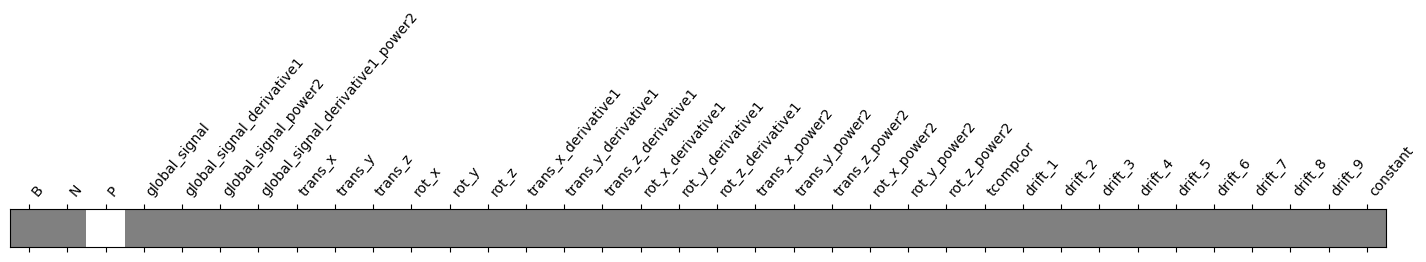

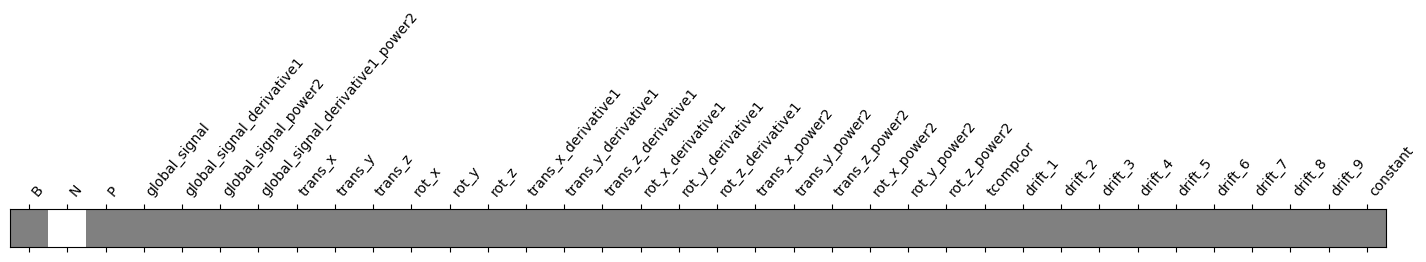

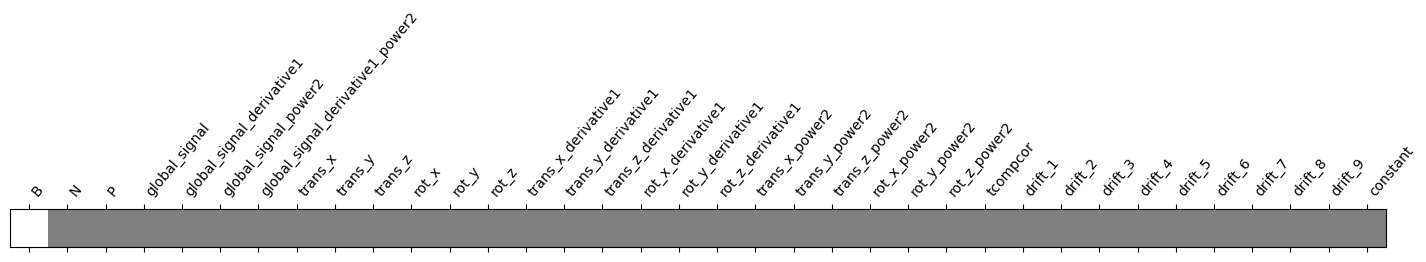

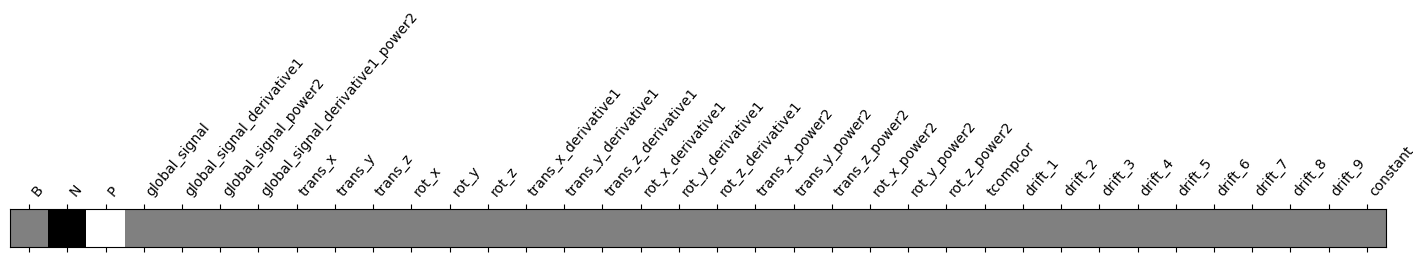

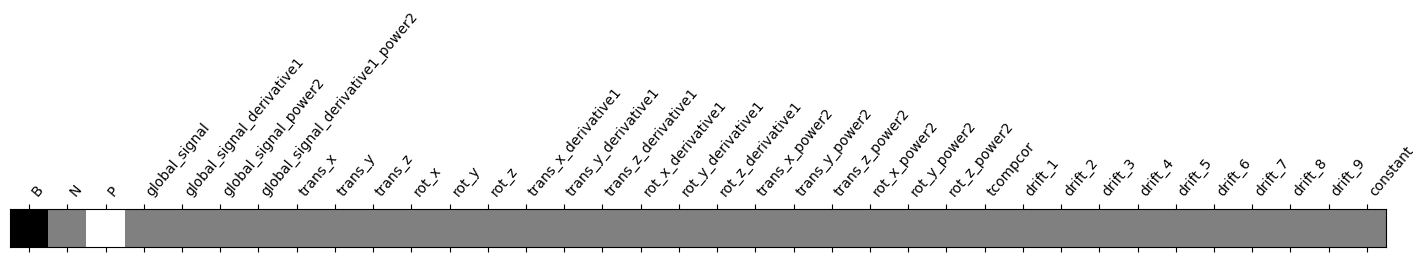

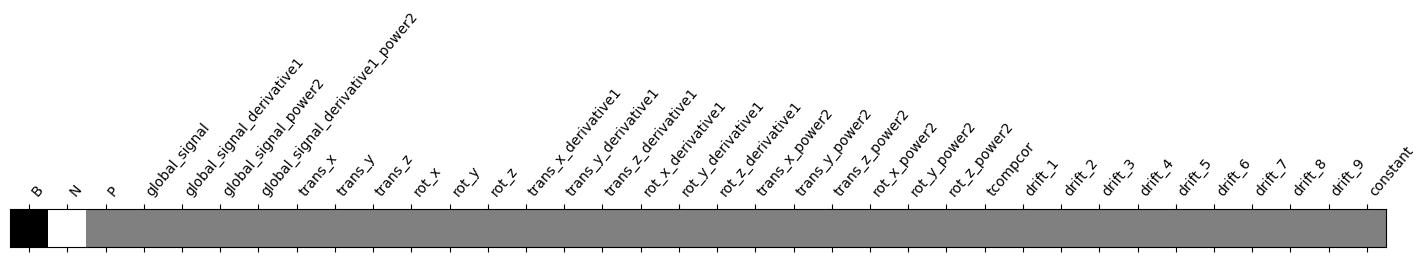

In [48]:
from nilearn.plotting import plot_contrast_matrix

#Define contrasts
contrasts=['P','N','B','P-N','P-B','N-B']


# Plot them to see what they look like
for contrast in contrasts:
    plot_contrast_matrix(contrast, design_matrix=design_matrix)

## Printing the result

/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


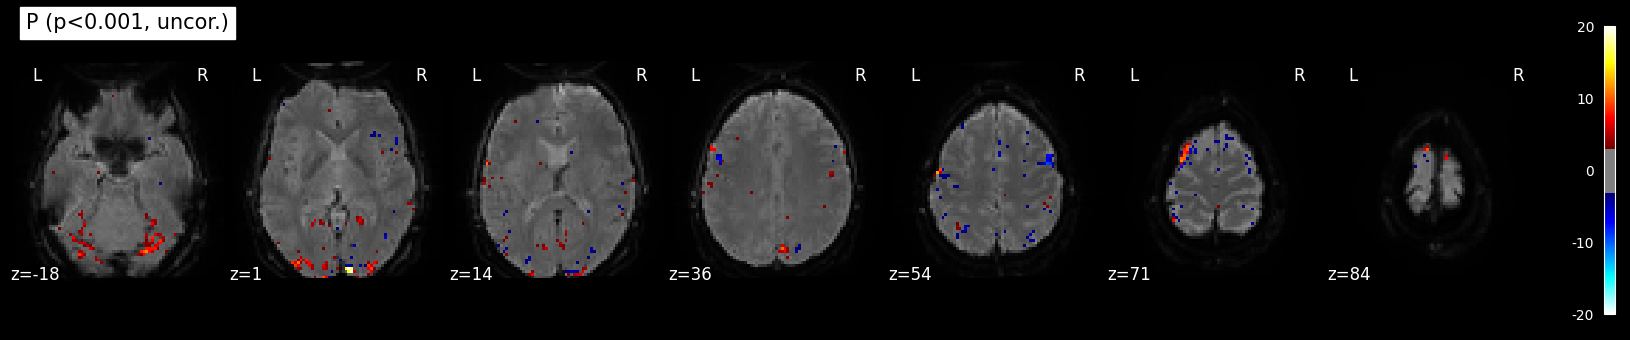

   Cluster ID          X           Y     Z  Peak Stat Cluster Size (mm3)
0           1 -10.615999 -102.188000   4.0  16.729202                366
1          1a -23.245999  -99.662000  -3.5   5.448373                   
2          1b -25.771999 -102.188000   6.5   3.664285                   
3           2  -8.089999  -99.662000  -6.0  14.111628                462
4          2a -13.141999  -92.084000   1.5   6.285140                   
5          2b  -8.089999  -94.610000 -11.0   5.426499                   
6           3  34.852001  -74.401999 -21.0  11.581520               1515
7          3a  24.748001  -79.454000 -18.5  11.472458                   
8          3b  29.800001  -66.823999 -18.5   8.333814                   
9          3c  17.170001  -84.506000 -13.5   7.975031                   
10          4 -40.927999  -89.558000  -1.0  11.364292                638
11         4a -33.349999  -94.610000  -1.0  10.964728                   
12         4b -28.297999  -87.032000   1.5   8.2104

/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


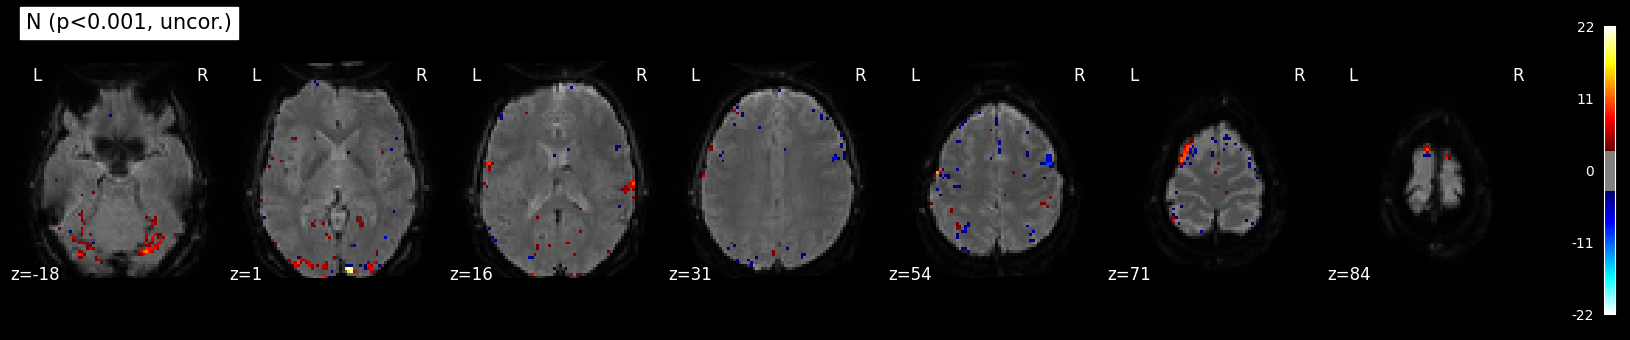

   Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0           1   9.592001 -94.610000   1.5  21.905694                366
1           2  -8.089999 -99.662000  -6.0  14.172067                685
2          2a  -3.037999 -89.558000  -6.0   7.540083                   
3          2b -13.141999 -92.084000   1.5   5.929448                   
4           3  24.748001 -79.454000 -18.5  12.214699               1499
5          3a  34.852001 -74.401999 -21.0  12.141661                   
6          3b  17.170001 -84.506000 -11.0   8.981387                   
7          3c  29.800001 -66.823999 -18.5   7.378537                   
8           4 -63.662000  -1.147999  14.0  11.251665                366
9          4a -63.662000   6.430001   6.5  10.836981                   
10         4b -63.662000  -1.147999  26.5   5.536696                   
11         4c -61.136000  -6.199999  16.5   4.133502                   
12          5 -40.927999 -89.558000  -1.0  10.726400            

/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


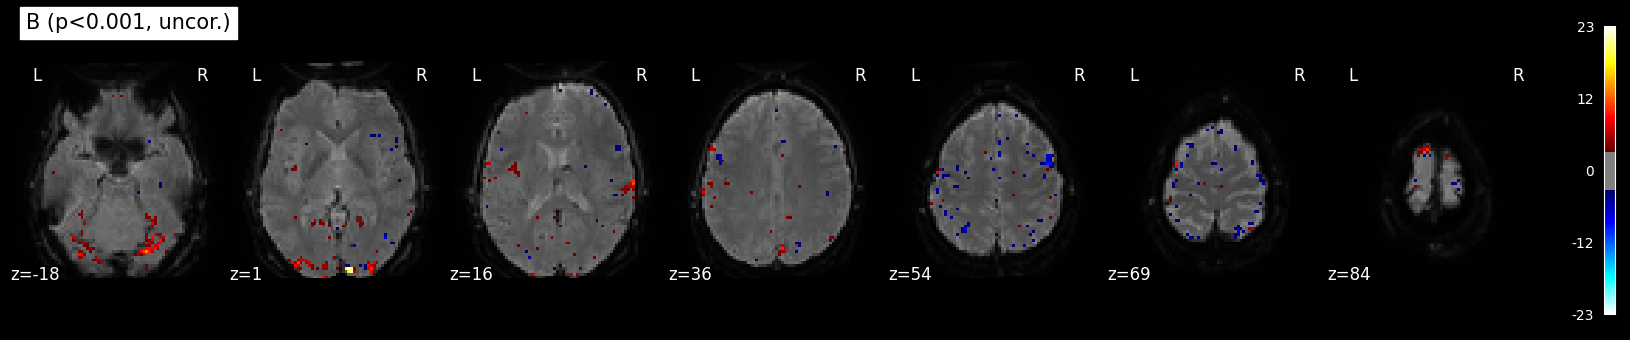

   Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0           1   9.592001 -94.610000   1.5  23.306381                462
1           2  24.748001 -79.454000 -18.5  13.159707               1674
2          2a  34.852001 -74.401999 -21.0  12.783508                   
3          2b  17.170001 -84.506000 -13.5  10.966190                   
4          2c  29.800001 -66.823999 -18.5   8.075075                   
5           3  -8.089999 -99.662000  -6.0  12.947700                382
6          3a -13.141999 -92.084000   1.5   5.200401                   
7           4 -33.349999 -94.610000  -1.0  11.674413                638
8          4a -40.927999 -89.558000  -1.0  10.852533                   
9          4b -28.297999 -87.032000   1.5   7.641497                   
10          5  29.800001 -94.610000   1.5   9.856756                638
11         5a  34.852001 -87.032000  -3.5   6.354318                   
12          6  -3.037999 -79.454000   6.5   8.826169            

/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


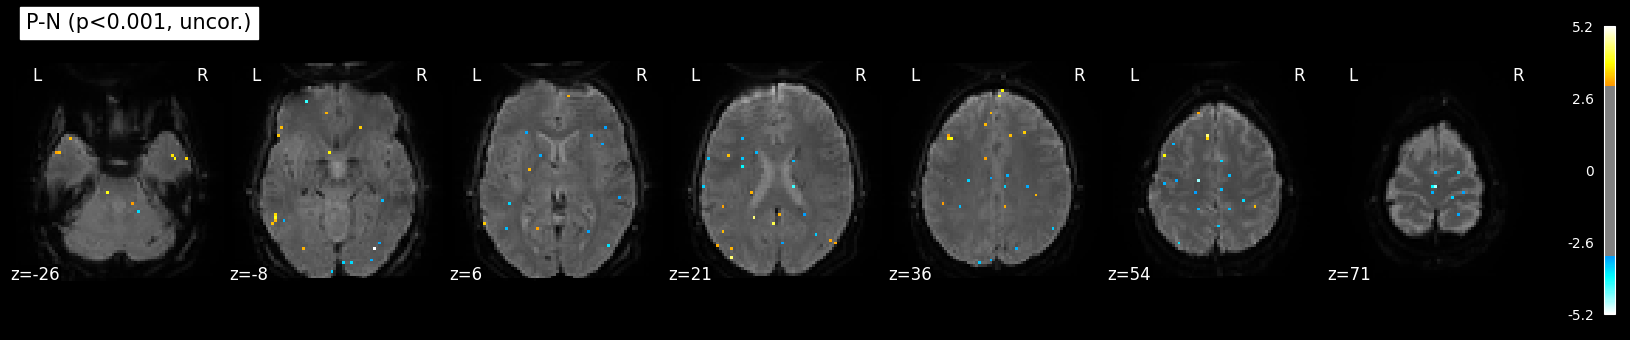

/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/reporting/_get_clusters_table.py:339: UserWarning: Attention: No clusters with stat higher than 3.090232306167813
  warnings.warn(
/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []


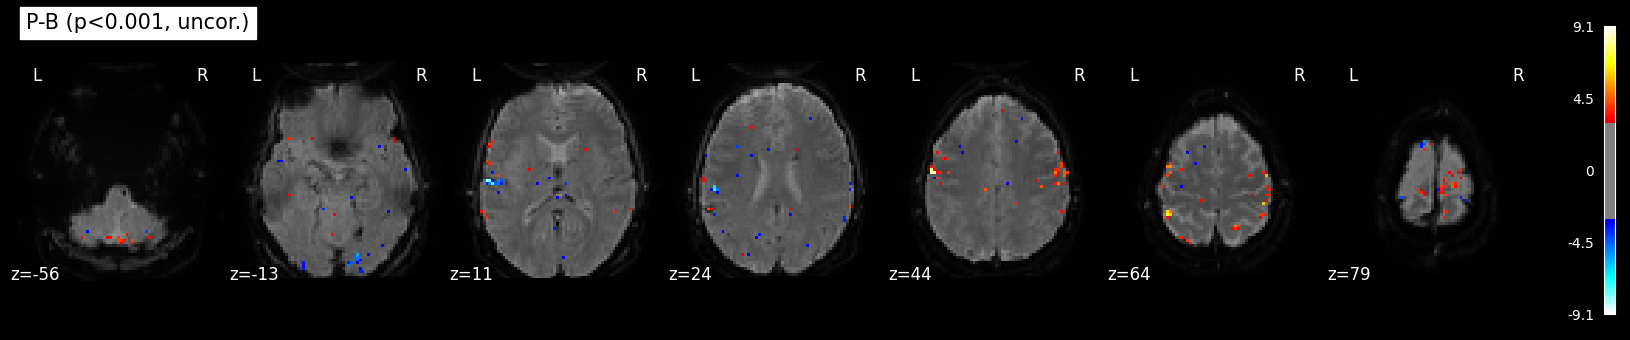

  Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0          1 -56.084000  -8.725999  44.0   9.087422                542
1         1a -51.032000  -8.725999  56.5   6.741622                   
2         1b -53.558000 -13.777999  46.5   4.611226                   
3          2  50.008001  -6.199999  39.0   8.086742                957
4         2a  57.586001   3.904001  41.5   6.801753                   
5         2b  50.008001 -11.251999  59.0   6.637188                   
6         2c  52.534001  -8.725999  44.0   4.996265                   
7          3  22.222001 -51.667999  59.0   5.311352                446
8         3a  17.170001 -59.245999  66.5   5.035368                   


/work/martines_folder/venvs/neuro_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


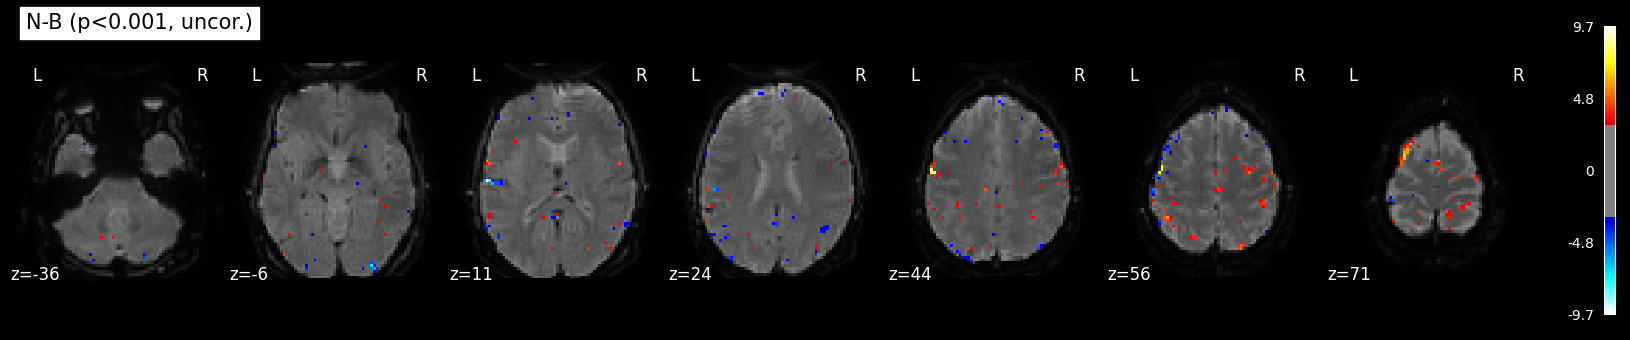

   Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0           1 -58.610000  -6.199999  44.0   8.596793                574
1          1a -56.084000  -8.725999  51.5   8.260817                   
2           2  50.008001  -6.199999  39.0   6.545237                765
3          2a  55.060001  -6.199999  46.5   5.895794                   
4          2b  57.586001   3.904001  41.5   5.757060                   
5          2c  50.008001  -8.725999  56.5   5.037901                   
6           3 -43.454000 -41.563999  51.5   6.231716                430
7          3a -43.454000 -49.141999  56.5   5.685654                   
8          3b -43.454000 -41.563999  46.5   3.624461                   
9           4  22.222001 -51.667999  59.0   5.546570                366
10         4a  17.170001 -59.245999  64.0   4.401407                   


In [49]:
from nilearn.plotting import plot_stat_map
from nilearn.reporting import get_clusters_table
from nilearn.image import mean_img

# Setting significance threshold
from scipy.stats import norm
p001_unc = norm.isf(0.001)

# Make a mean image for display purposes
mean_img_ = mean_img(imgs)

for contrast in contrasts:
    z_map = model.compute_contrast(contrast, output_type='z_score')

    titlex=''.join([contrast, ' ', '(p<0.001, uncor.)'])
    plot_stat_map(z_map, bg_img=mean_img_, threshold=p001_unc,
              display_mode='z',  black_bg=True,
              title=titlex)
    plt.show()
    
    # Make a table of cluster coordinates.
    table = get_clusters_table(z_map, stat_threshold=p001_unc,
                           cluster_threshold=20)
    print(table)

## Export

In [50]:
import pickle

# Saving the objects:
f = open('/work/fMRI_analysis/model.pkl', 'wb')
pickle.dump([models, models_run_imgs, models_events, models_confounds], f)
f.close()